<a href="https://colab.research.google.com/github/junieberry/DL-fromScratch2/blob/main/01_SpiralDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  cd "/content/drive/MyDrive/밑시딥"

/content/drive/MyDrive/밑시딥


In [ ]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch-2.git

Cloning into 'deep-learning-from-scratch-2'...
remote: Enumerating objects: 598, done.
remote: Total 598 (delta 0), reused 0 (delta 0), pack-reused 598
Receiving objects: 100% (598/598), 29.81 MiB | 16.03 MiB/s, done.
Resolving deltas: 100% (360/360), done.


In [ ]:
cd /content/drive/MyDrive/밑시딥/deep-learning-from-scratch-2

/content/drive/MyDrive/밑시딥/deep-learning-from-scratch-2


In [ ]:
import sys
sys.path.append('..') #부모 디렉터리
from dataset import spiral
import matplotlib.pyplot as plt

x,t=spiral.load_data()
print('x',x.shape) # 2 dimension
print('t',t.shape) # 3 class

x (300, 2)
t (300, 3)


In [ ]:
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

In [ ]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O= input_size, hidden_size, output_size

    # 가중치 초기화
    W1=0.01*np.random.randn(I,H)
    b1=np.zeros(H)
    W2=0.01*np.random.randn(H,O)
    b2=np.zeros(O)

    ##layers 생성
    self.layers=[
                 Affine(W1,b1),
                 Sigmoid(),
                 Affine(W2,b2)
    ]
    self.loss_layer=SoftmaxWithLoss()

    ## 
    self.params, self.grads=[],[]
    for layer in self.layers:
      self.params+=layer.params
      self.grads+=layer.grads
  

  def predict(self,x):
      for layer in self.layers:
        x=layer.forward(x)
      return x
  
  def forward(self,x,t):
    score=self.predict(x)
    loss=self.loss_layer.forward(score, t)
    return loss
  
  def backward(self, dout=1):
    dout=self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout=layer.backward(dout)

    return dout


In [ ]:
from common.optimizer import SGD

##hyperparameter
max_epoch=300
batch_size=30
learning_rate=1

## set
model=TwoLayerNet(input_size=2, hidden_size=10,output_size=3)
optimizer=SGD(lr=learning_rate)

data_size=len(x)
max_iters=data_size//batch_size
total_loss=0
loss_count=0
loss_list=[]



In [ ]:

for epoch in range(max_epoch):
  ## shuffle
  idx=np.random.permutation(data_size)
  x=x[idx]
  t=t[idx]

  for iters in range(max_iters):
    batch_x=x[iters*batch_size:(iters+1)*batch_size]
    batch_t=t[iters*batch_size:(iters+1)*batch_size]

    loss=model.forward(batch_x, batch_t)
    model.backward()
    optimizer.update(model.params, model.grads)

    total_loss+=loss
    loss_count+=1

    if (iters+1)%1==0:
      avg_loss=total_loss/loss_count
      print('| %d | 반복 %d / %d | 손실 %.2f'%(epoch+1, iters+1, max_iters, avg_loss))
      loss_list.append(avg_loss)
      total_loss, loss_count=0,0

| 1 | 반복 1 / 10 | 손실 1.86
| 1 | 반복 2 / 10 | 손실 1.16
| 1 | 반복 3 / 10 | 손실 1.13
| 1 | 반복 4 / 10 | 손실 1.16
| 1 | 반복 5 / 10 | 손실 1.10
| 1 | 반복 6 / 10 | 손실 1.10
| 1 | 반복 7 / 10 | 손실 1.14
| 1 | 반복 8 / 10 | 손실 1.09
| 1 | 반복 9 / 10 | 손실 1.15
| 1 | 반복 10 / 10 | 손실 1.07
| 2 | 반복 1 / 10 | 손실 1.42
| 2 | 반복 2 / 10 | 손실 1.20
| 2 | 반복 3 / 10 | 손실 1.18
| 2 | 반복 4 / 10 | 손실 1.12
| 2 | 반복 5 / 10 | 손실 1.09
| 2 | 반복 6 / 10 | 손실 1.17
| 2 | 반복 7 / 10 | 손실 1.10
| 2 | 반복 8 / 10 | 손실 1.16
| 2 | 반복 9 / 10 | 손실 1.11
| 2 | 반복 10 / 10 | 손실 1.10
| 3 | 반복 1 / 10 | 손실 1.15
| 3 | 반복 2 / 10 | 손실 1.09
| 3 | 반복 3 / 10 | 손실 1.14
| 3 | 반복 4 / 10 | 손실 1.10
| 3 | 반복 5 / 10 | 손실 1.17
| 3 | 반복 6 / 10 | 손실 1.15
| 3 | 반복 7 / 10 | 손실 1.11
| 3 | 반복 8 / 10 | 손실 1.18
| 3 | 반복 9 / 10 | 손실 1.20
| 3 | 반복 10 / 10 | 손실 1.14
| 4 | 반복 1 / 10 | 손실 1.12
| 4 | 반복 2 / 10 | 손실 1.13
| 4 | 반복 3 / 10 | 손실 1.21
| 4 | 반복 4 / 10 | 손실 1.17
| 4 | 반복 5 / 10 | 손실 1.10
| 4 | 반복 6 / 10 | 손실 1.09
| 4 | 반복 7 / 10 | 손실 1.25
| 4 | 반복 8 / 10 | 손실 1.21
| 4 | 반복 

### np.meshgrid

길이가 N인 1차원 좌표 배열에서 N차원 직사각형 격자를 만드는 함수

https://davey.tistory.com/entry/Python-%ED%8C%8C%EC%9D%B4%EC%8D%AC-numpy-matplotlib-%EB%AA%A8%EB%93%88-meshgrid-%EA%B5%AC%ED%98%84



```
np.meshgrid(x, y, s)
```

x = x축 value

y= y축 value

s= sparse boolean value


### np.ravel

Numpy 다차원 배열을 1차원으로 바꿔준다.

### np.c_

c가 column의 c

열을 추가해준다



이때 meshgrid로 전체 격자를 채우고 ravel로 풀어준 후 격자 내의 점들을 predict해서 그려준다.




### plt.countourf

등치선을 그릴 수 있다.

plt.countur는 색 없이 등치선만 표시해준다.

```
plt.contour(xmesh, ymesh, zmesh)
```



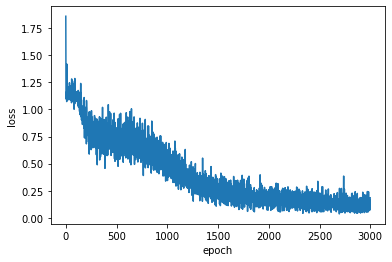

KeyboardInterrupt: ignored

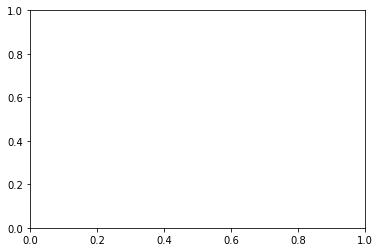

In [ ]:
# 학습 결과
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 경계 영역 보여주기
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 보여주기
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

### plt.scatter

다양한 마커사이즈와 컬러로 예쁜 산포그래프를 그릴 수 있다.

```
scatter(x, y, s=None, c=None)
```

x,y = x축과 y축

s = 마커의 크기

c = 마커의 색상
